In [1]:
'''
【课程1.6】  正太性检验

利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验

'''

'\n【课程1.6】  正太性检验\n\n利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。\n\n直方图初判 / QQ图判断 / K-S检验\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

      values
0  10.200819
1   7.327802
2   8.105353
3   8.941955
4  10.782805


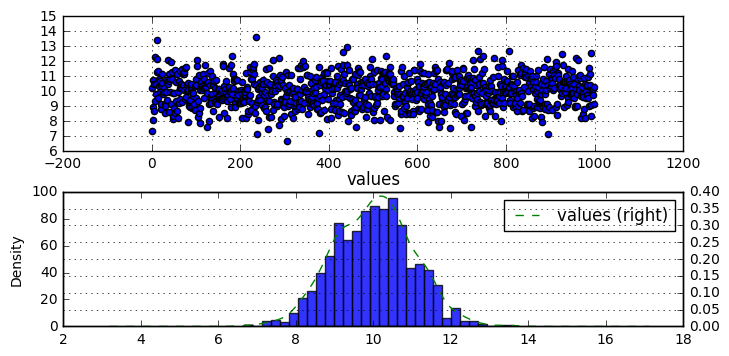

In [13]:
#直方图判断
data = pd.DataFrame(np.random.randn(1000)+10,
                   columns = ['values'])
print(data.head())

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(data.index,data.values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
data.hist(bins = 30,ax = ax2,alpha = 0.8)
data.plot(kind = 'kde',linestyle = '--',secondary_y= True,ax = ax2)
plt.grid()
# 绘制直方图
# 呈现较明显的正太性

      values
0  10.514273
1   9.335846
2  10.332074
3   7.788924
4  10.437586
data的均值为：9.97,data的方差为：1.02
-------
   index    values       p         q
0    376  6.859358 -0.0005 -3.051814
1    166  7.073790  0.0005 -2.841680
2    134  7.145692  0.0015 -2.771220
3     18  7.236296  0.0025 -2.682432
4    989  7.265787  0.0035 -2.653532
四分之一分位数为：9.30,四分之三分位数为：10.66


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


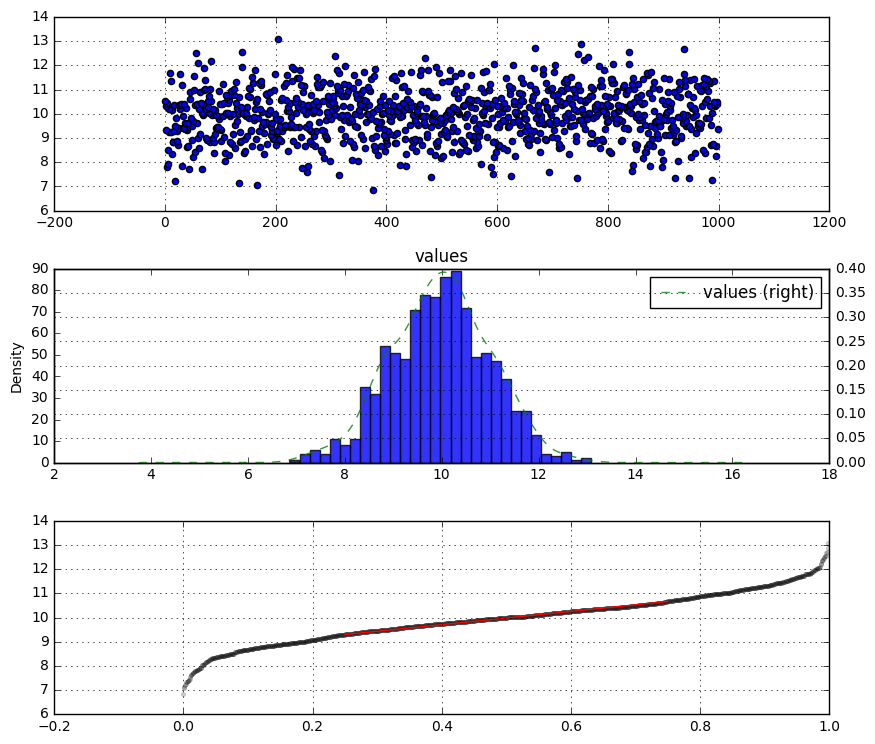

In [34]:
# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考
data = pd.DataFrame(np.random.randn(1000)+10,
                   columns = ['values'])
print(data.head())

mean = data['values'].mean()
std = data['values'].std()
print('data的均值为：%.2f,data的方差为：%.2f'%(mean,std))
print('-------')

data.sort('values',inplace = True)
data_r = data.reset_index(drop = False)
data_r['p'] = (data_r.index - 0.5) / len(data_r)
data_r['q'] = (data_r['values'] - mean) /std
print(data_r.head())
# 计算百分位数 p(i)
# 计算q值

st = data['values'].describe()
x1,y1 = 0.25,st['25%']
x2,y2 = 0.75,st['75%']
print('四分之一分位数为：%.2f,四分之三分位数为：%.2f'%(y1,y2))
fig = plt.figure(figsize =(10,9))
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(data.index,data.values)
plt.grid()
# 绘制数据分布图
ax2 = fig.add_subplot(3,1,2)
data.hist(ax = ax2,alpha = 0.8,bins = 30)
data.plot(ax = ax2,kind = 'kde',linestyle = '--',alpha = 0.8,secondary_y=True)
plt.grid()

ax3 = fig.add_subplot(3,1,3)
ax3.plot(data_r['p'],data_r['values'],'k.',alpha= 0.2)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()

样本均值为：79.74,样本方差为：5.94
   次数  血糖浓度
0   2    68
1   2    72
2   2    75
3   2    76
4   6    77
实际观测D的值为：0.1597


,次数,血糖浓度,累计次数,累计频率,标准化取值,理论分布,D
0,2,68,2,0.057143,-1.977701,0.0244,0.032743
1,2,72,4,0.114286,-1.304031,0.0968,0.017486
2,2,75,6,0.171429,-0.798779,0.2148,0.043371
3,2,76,8,0.228571,-0.630362,0.2643,0.035729
4,6,77,14,0.400000,-0.461945,0.3228,0.077200


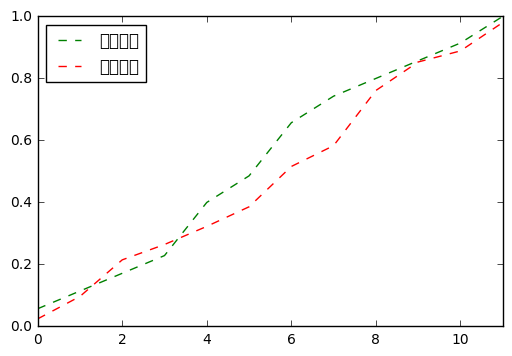

In [52]:
# KS检验，理论推导

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度
df = pd.DataFrame(data,columns = ['values'])
mean = df['values'].mean()
std = df['values'].std()
print('样本均值为：%.2f,样本方差为：%.2f'%(mean,std))

s = df['values'].value_counts().sort_index()
df_new = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
print(df_new.head())
df_new['累计次数'] = df_new['次数'].cumsum()
df_new['累计频率'] = df_new['累计次数'] / len(data)
df_new['标准化取值'] = (df_new['血糖浓度'] - mean) /std
df_new['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_new['D'] = np.abs(df_new['累计频率']-df_new['理论分布'])
dmax = df_new['D'].max()
print('实际观测D的值为：%.4f'%dmax)
# D值序列计算结果表格

df_new['累计频率'].plot(style = '--g')
df_new['理论分布'].plot(style = '--r')
plt.legend(loc = 'best')
df_new.head()

In [53]:
from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布

KstestResult(statistic=0.15901807048240979, pvalue=0.30662972583580261)